## Google Drive mount

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 라이브러리 포함

In [25]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import VGG16


from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image

#ILSVRC 대회에서 성능 좋은 모델 제공
#https://keras.io/applications/
#keras.applications.densenet.DenseNet121(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#keras.applications.densenet.DenseNet169(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#keras.applications.densenet.DenseNet201(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

#keras.applications.resnet.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#keras.applications.resnet.ResNet101(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#keras.applications.resnet.ResNet152(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#keras.applications.resnet_v2.ResNet50V2(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#keras.applications.resnet_v2.ResNet101V2(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#keras.applications.resnet_v2.ResNet152V2(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

#conv_layers = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



## 폴더에 저장된 데이터셋을  ImageDataGenerator로 가져오기

In [33]:
#VGG16 입력형식으로  augmentation 처리 포함한 ImageDataGenerator 생성
data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      rescale=1./255
#      preprocessing_function=vgg16.preprocess_input
)
#VGG16 입력형식으로  augmentation 처리 없는 ImageDataGenerator 생성
data_no_aug_generator = ImageDataGenerator(
      rescale=1./255
#      preprocessing_function=vgg16.preprocess_input
)

##train폴더에서 데이터를 읽어서  train_data_generator 생성
train_img_path = '/content/drive/My Drive/DeepLearning/data/CatsDogs/train/'
train_data_generator = data_aug_generator.flow_from_directory(
      train_img_path,
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)
##test 폴더에서 데이터를 읽어서  train_data_generator 생성
test_img_path = '/content/drive/My Drive/DeepLearning/data/CatsDogs/test/'
test_data_generator = data_no_aug_generator.flow_from_directory(
      test_img_path ,
      target_size=(224,224),
      class_mode='sparse'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Visualize training images

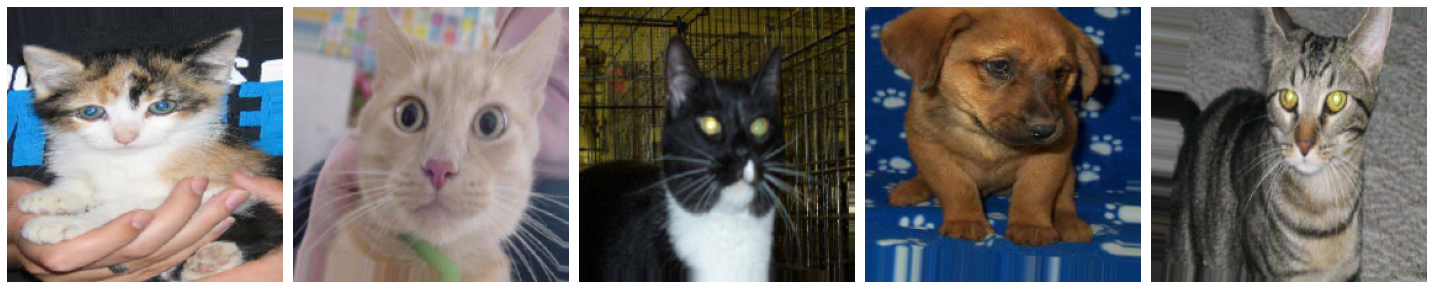

In [34]:
#train_data_gen에서 batch size만큼 학습이미지만 추출하여 확인

sample_training_images, _ = next(train_data_generator)

# 이미지 plot (1줄에 5개 출력)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])

## Create the model

- (1)convolution blocks (ImageNET을 사전 학습한 VGG16모델)
- (2)classifier (fully connected layer)
- Dense(1024)
- Dropout(0.5)
- Dense(2)

In [42]:

conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = Sequential([
            conv_layers,
            Flatten(),
            Dense(1024, activation='relu'),
            Dropout(0.5),
            Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Model summary

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 2050      
Total params: 40,407,874
Trainable params: 25,693,186
Non-trainable params: 14,714,688
_________________________________________________________________


## Train the model

In [43]:
epochs=10

history = model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      validation_steps=5,
      steps_per_epoch=train_data_generator.samples/64,
      epochs= epochs
)


Epoch 1/10
32/31 [==============================] - 37s 1s/step - loss: 2.9844 - accuracy: 0.7050 - val_loss: 0.2599 - val_accuracy: 0.9250
Epoch 2/10
32/31 [==============================] - 37s 1s/step - loss: 0.4132 - accuracy: 0.8570 - val_loss: 0.2088 - val_accuracy: 0.8938
Epoch 3/10
32/31 [==============================] - 37s 1s/step - loss: 0.2379 - accuracy: 0.9060 - val_loss: 0.2286 - val_accuracy: 0.9000
Epoch 4/10
32/31 [==============================] - 37s 1s/step - loss: 0.2228 - accuracy: 0.9060 - val_loss: 0.1885 - val_accuracy: 0.9312
Epoch 5/10
32/31 [==============================] - 37s 1s/step - loss: 0.2113 - accuracy: 0.9085 - val_loss: 0.2177 - val_accuracy: 0.9000
Epoch 6/10
32/31 [==============================] - 37s 1s/step - loss: 0.1959 - accuracy: 0.9160 - val_loss: 0.2432 - val_accuracy: 0.8625
Epoch 7/10
32/31 [==============================] - 37s 1s/step - loss: 0.1738 - accuracy: 0.9330 - val_loss: 0.1913 - val_accuracy: 0.9312
Epoch 8/10
32/31 [==

## Visualize training results

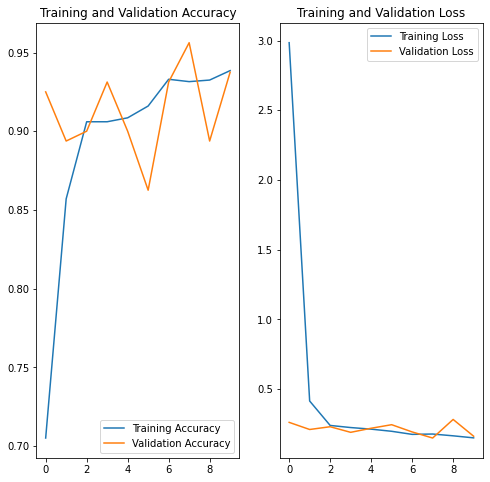

In [45]:
 epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict new test image

In [48]:
y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys())
predicted = np.argmax(y_, axis=1)
print(predicted.shape)
print(predicted[0], custom_labels[predicted[0]])
print(predicted[1], custom_labels[predicted[1]])

(512,)
0 cats
1 dogs


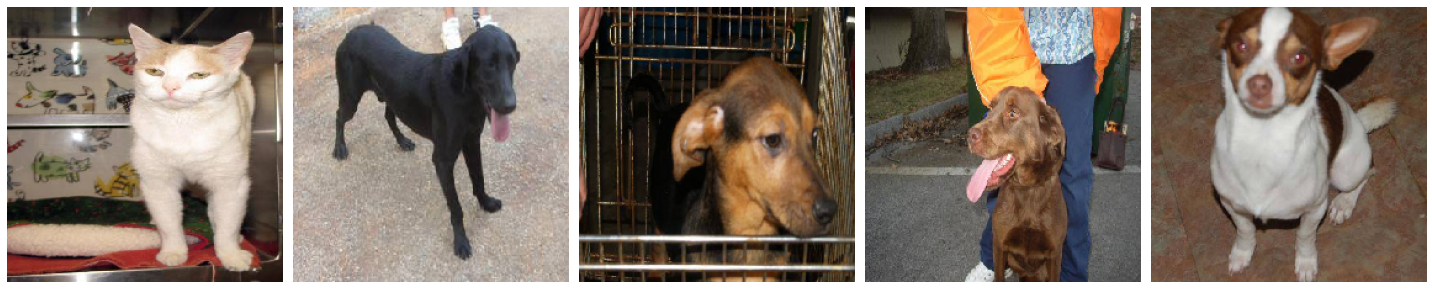

In [47]:
#test_data_gen에서 batch size만큼 이미지만 추출하여 확인

test_images, _ = next(test_data_generator)

# 이미지 plot (1줄에 5개 출력)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(test_images[:5])